In [1]:
import pandas as pd
def get_x_y()->list:
    df = pd.read_csv("../data/processed/cleaned_results_1.csv")
    X = df[['name','brandName']]
    Y = df['categoryName']
    return X,Y

In [2]:
X,y = get_x_y()

In [11]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(
    sampling_strategy='auto',
    random_state=42
)
X_resampled, y_resampled = ros.fit_resample(X, y)

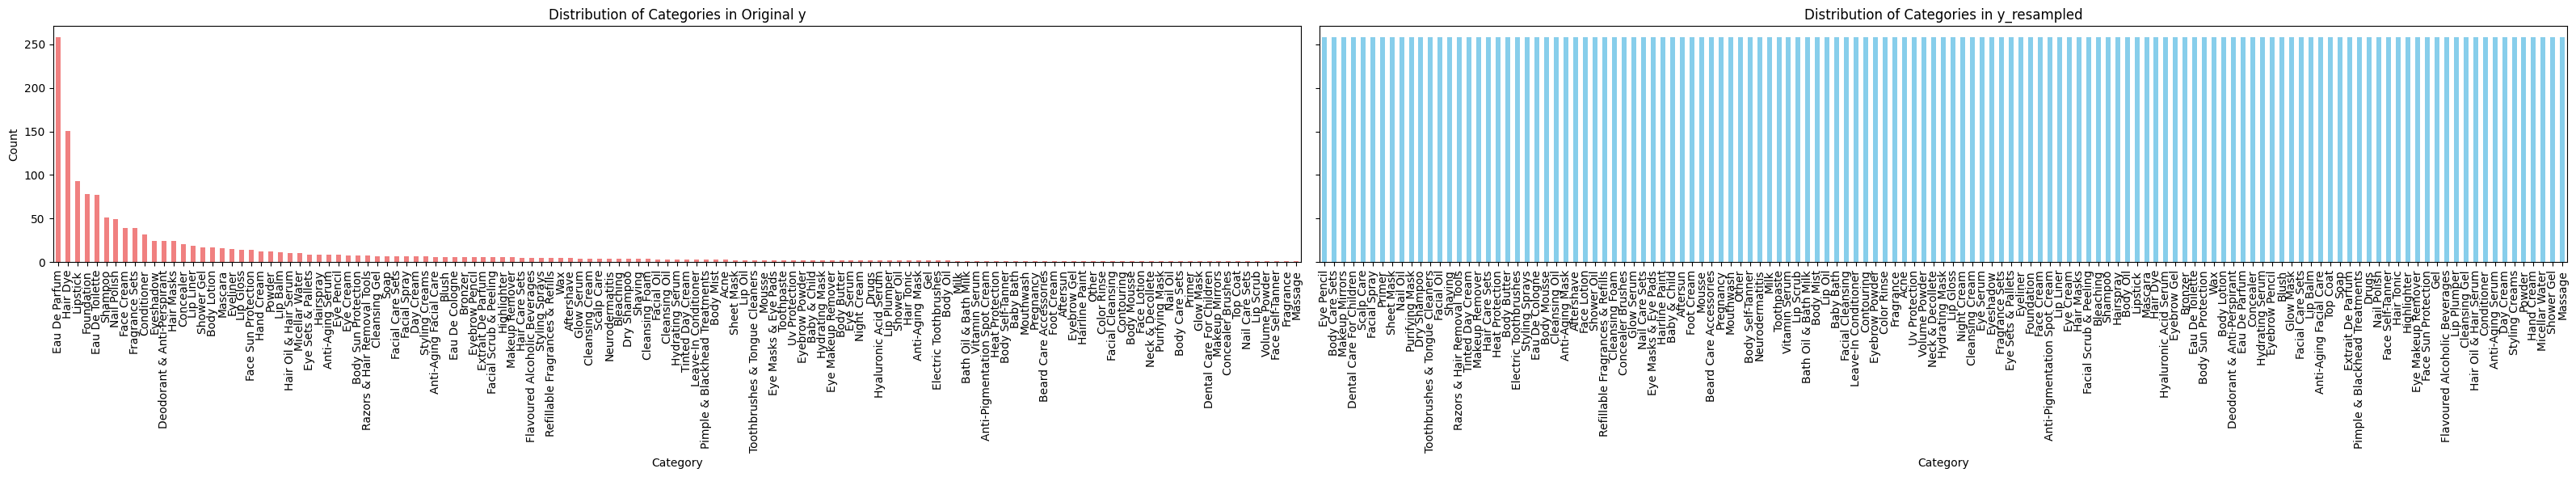

In [12]:
import matplotlib.pyplot as plt

# Plot the distribution of y and y_resampled side by side
fig, axes = plt.subplots(1, 2, figsize=(32, 6), sharey=True)

# Plot original y
y.value_counts().plot(kind='bar', ax=axes[0], color='lightcoral')
axes[0].set_title('Distribution of Categories in Original y')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot resampled y_resampled
y_resampled.value_counts().plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Distribution of Categories in y_resampled')
axes[1].set_xlabel('Category')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [24]:
combined_resampled = X_resampled.copy()
combined_resampled['categoryName'] = y_resampled.values

In [31]:
massage_rows = combined_resampled[combined_resampled['categoryName'] == 'Massage']
massage_rows

,name,brandName,categoryName
1423,Weleda Arnica Massage Oil Sports Preparation a...,Weleda,Massage
24215,Weleda Arnica Massage Oil Sports Preparation a...,Weleda,Massage
24216,Weleda Arnica Massage Oil Sports Preparation a...,Weleda,Massage
24217,Weleda Arnica Massage Oil Sports Preparation a...,Weleda,Massage
24218,Weleda Arnica Massage Oil Sports Preparation a...,Weleda,Massage
...,...,...,...
24467,Weleda Arnica Massage Oil Sports Preparation a...,Weleda,Massage
24468,Weleda Arnica Massage Oil Sports Preparation a...,Weleda,Massage
24469,Weleda Arnica Massage Oil Sports Preparation a...,Weleda,Massage
24470,Weleda Arnica Massage Oil Sports Preparation a...,Weleda,Massage


In [14]:
y_resampled.value_counts()

categoryName
Eye Pencil                  258
Body Care Sets              258
Makeup Mirrors              258
Dental Care For Children    258
Scalp Care                  258
                           ... 
Powder                      258
Hand Cream                  258
Micellar Water              258
Shower Gel                  258
Massage                     258
Name: count, Length: 129, dtype: int64

In [22]:
X_resampled

,name,brandName
0,Shiseido SMK Eye Kajal Ink Artist07 0.8 grams,Shiseido
1,Shiseido Shimmer Gel Gloss No.02 Toki Nude 9ml,Shiseido
2,Paris Corner Emir Opulentia Primus - Eau De Pa...,Paris Corner
3,Deodorant Antiperspiran 48h Balance Dermo 200ml,Sanex
4,Collistar Body Cream,Collistar
...,...,...
33277,Redken Texture Rough Paste For all Hair Types ...,Redken
33278,Redken Matte Clay Strong Hold Texturizing Clay...,Redken
33279,Redken Matte Clay Strong Hold Texturizing Clay...,Redken
33280,Redken Matte Clay Strong Hold Texturizing Clay...,Redken


### Useless to train data using same embeddings, since it will not generalise well in unseen real data.